In [2]:
import pandas as pd
import numpy as np
import re, urllib.parse, matplotlib, folium
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [3]:
df = pd.read_csv("clean_data.csv", low_memory=False)
df.head()

,id,Locality,Zip,Province,Type of property,Subtype of property,Type of sale,Price,Price of square meter,Building condition,...,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,10578809,liedekerke,1770,Flemish Brabant,house,house,for sale,349000,1938.89,As new,...,3,256.0,241,5,1,25.0,1,150.0,0.0,0.0
1,10578941,sint-andries,8200,West Flanders,house,house,for sale,625000,3378.38,As new,...,3,539.0,292,5,0,0.0,1,400.0,0.0,0.0
2,10577515,seraing,4100,Liège,house,house,for sale,149000,1419.05,Good,...,2,105.0,469,3,1,NaN,1,25.0,0.0,0.0
3,10577846,andenne,5300,Namur,house,house,for sale,335000,1602.87,Good,...,1,2185.0,196,6,1,NaN,1,NaN,0.0,0.0
4,10523130,forest,1190,Brussels Capital Region,house,house,for sale,545000,2145.67,To be done up,...,1,260.0,517,2,1,45.0,0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          18030 non-null  int64  
 1   Locality                    18030 non-null  object 
 2   Zip                         18030 non-null  int64  
 3   Province                    18030 non-null  object 
 4   Type of property            18030 non-null  object 
 5   Subtype of property         18030 non-null  object 
 6   Type of sale                18030 non-null  object 
 7   Price                       18030 non-null  int64  
 8   Price of square meter       18030 non-null  float64
 9   Building condition          15187 non-null  object 
 10  Building Cond. values       18030 non-null  int64  
 11  Number of facades           13828 non-null  float64
 12  Number of rooms             17699 non-null  float64
 13  Living area                 180

In [5]:
house_target = ['Price','Living area','Number of rooms','Furnished','Garden','Terrace','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption']
apartment_target = ['Price','Living area','Number of rooms','Furnished','Open fire','Building Cond. values','Kitchen values','Primary energy consumption']

In [6]:
house_target_data = df[df["Type of property"]=="house"][house_target]
house_target_data.corr(method="spearman")

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Price,1.000000,0.708811,0.526919,0.009590,0.057048,0.140829,0.188644,0.421041,0.303484,0.260953,0.267317,0.190946,-0.332577
Living area,0.708811,1.000000,0.653311,-0.010263,0.011333,0.076107,0.166876,0.419429,0.229320,0.222062,0.138196,0.087594,-0.214579
Number of rooms,0.526919,0.653311,1.000000,0.008830,0.044414,0.065497,0.100298,0.254589,0.130046,0.158345,0.080063,0.061367,-0.141007
Furnished,0.009590,-0.010263,0.008830,1.000000,-0.001870,0.010069,-0.012361,-0.018284,0.002399,0.036687,0.031727,0.026043,-0.016620
Garden,0.057048,0.011333,0.044414,-0.001870,1.000000,0.124474,0.099096,0.161334,0.072593,0.002780,0.043897,0.065031,0.013628
Terrace,0.140829,0.076107,0.065497,0.010069,0.124474,1.000000,0.022148,0.082954,0.083282,0.086341,0.170922,0.195941,-0.096580
Open fire,0.188644,0.166876,0.100298,-0.012361,0.099096,0.022148,1.000000,0.200504,0.198667,0.077916,0.025335,0.032264,-0.039269
Surface of the land,0.421041,0.419429,0.254589,-0.018284,0.161334,0.082954,0.200504,1.000000,0.722604,0.253196,0.033731,0.039304,0.038587
Number of facades,0.303484,0.229320,0.130046,0.002399,0.072593,0.083282,0.198667,0.722604,1.000000,0.215351,0.068958,0.064878,0.041344
Swimming pool,0.260953,0.222062,0.158345,0.036687,0.002780,0.086341,0.077916,0.253196,0.215351,1.000000,0.133699,0.114586,-0.104210


In [7]:
house_target_data.describe()

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
count,9.539000e+03,9539.000000,9474.000000,9539.000000,9539.000000,9539.000000,9539.000000,9045.000000,8356.000000,9539.000000,9539.000000,9539.000000,9539.000000
mean,5.539761e+05,255.255268,3.798501,0.018555,0.582975,0.689276,0.093825,1408.466777,2.991503,0.049481,2.358318,1.076738,374.147919
std,6.650943e+05,1811.083053,1.716173,0.134956,0.493093,0.462814,0.329418,8067.571846,0.873055,0.216882,1.496108,1.347934,1496.913984
min,1.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,2.590000e+05,145.000000,3.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,0.000000,2.000000,0.000000,189.000000
50%,3.860000e+05,190.000000,3.000000,0.000000,1.000000,1.000000,0.000000,463.000000,3.000000,0.000000,3.000000,1.000000,301.000000
75%,5.950000e+05,268.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1000.000000,4.000000,0.000000,3.000000,2.000000,443.000000
max,1.100000e+07,175173.000000,30.000000,1.000000,1.000000,1.000000,10.000000,500000.000000,10.000000,1.000000,4.000000,3.000000,83408.000000


<Axes: >

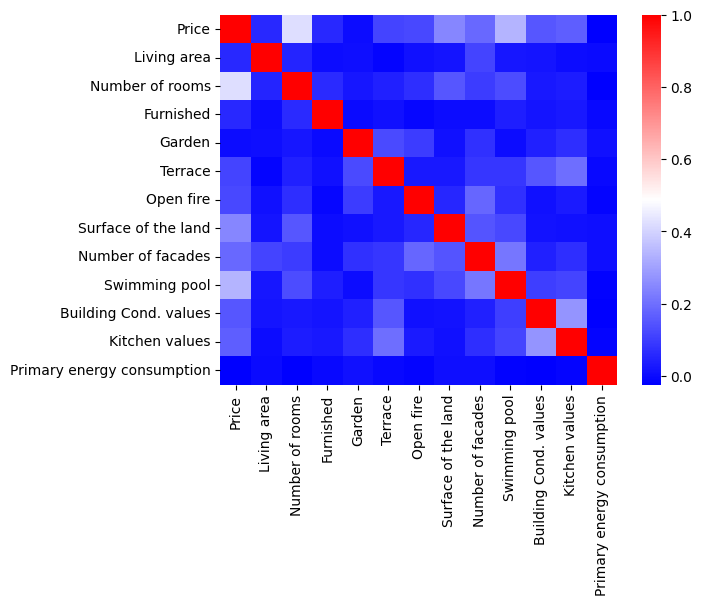

In [8]:
plt.figure()
sns.heatmap(house_target_data.corr(), cmap="bwr", annot=False)

In [9]:
# plt.figure(figsize=(40,30))
# house_target_data.hist()
# plt.show()

In [10]:
# plt.figure (figsize= (18,12))
# sns.boxplot(x=house_target_data["Number of rooms"], y= house_target_data["Living area"], palette= "GnBu_d")

# plt.show()

In [11]:
# sns.pairplot(house_target_data)

In [12]:
# sns.pairplot(house_target_data[["Price","Living area","Number of rooms"]])

In [13]:
# sns.boxplot(x=house_target_data["Living area"], y=house_target_data["Price"] , palette= "GnBu_d")
# plt.show()

In [14]:
# zip_df = pd.read_csv("zipcode-belgium.csv", names=["Zip","location","long","lat"])
# house_target = ['Price','Living area','Number of rooms','Furnished','Garden','Terrace','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption',"Zip"]
# house_df = df[df["Type of property"]=="house"][house_target]
# house_df = house_df.merge(zip_df, on='Zip', how='left')

In [15]:
# def get_center_latlong(df):
#     # get the center of my map for plotting
#     centerlat = (zip_df['lat'].max() + zip_df['lat'].min()) / 2
#     centerlong = (zip_df['long'].max() + zip_df['long'].min()) / 2
#     return centerlat, centerlong

# center = get_center_latlong(df)
# m = folium.Map(location=center, zoom_start=10)
# # m.save('circle_map.html')

# # go through each home in set, make circle, and add to map.
# for i in range(len(df)):
#     folium.Circle(
#         location=[df.iloc[i]['lat'], df.iloc[i]['long']],
#         radius=10,
#         fill=True,
#         fill_opacity=0.2
#     ).add_to(m)
        
# m.save('circle_map.html')

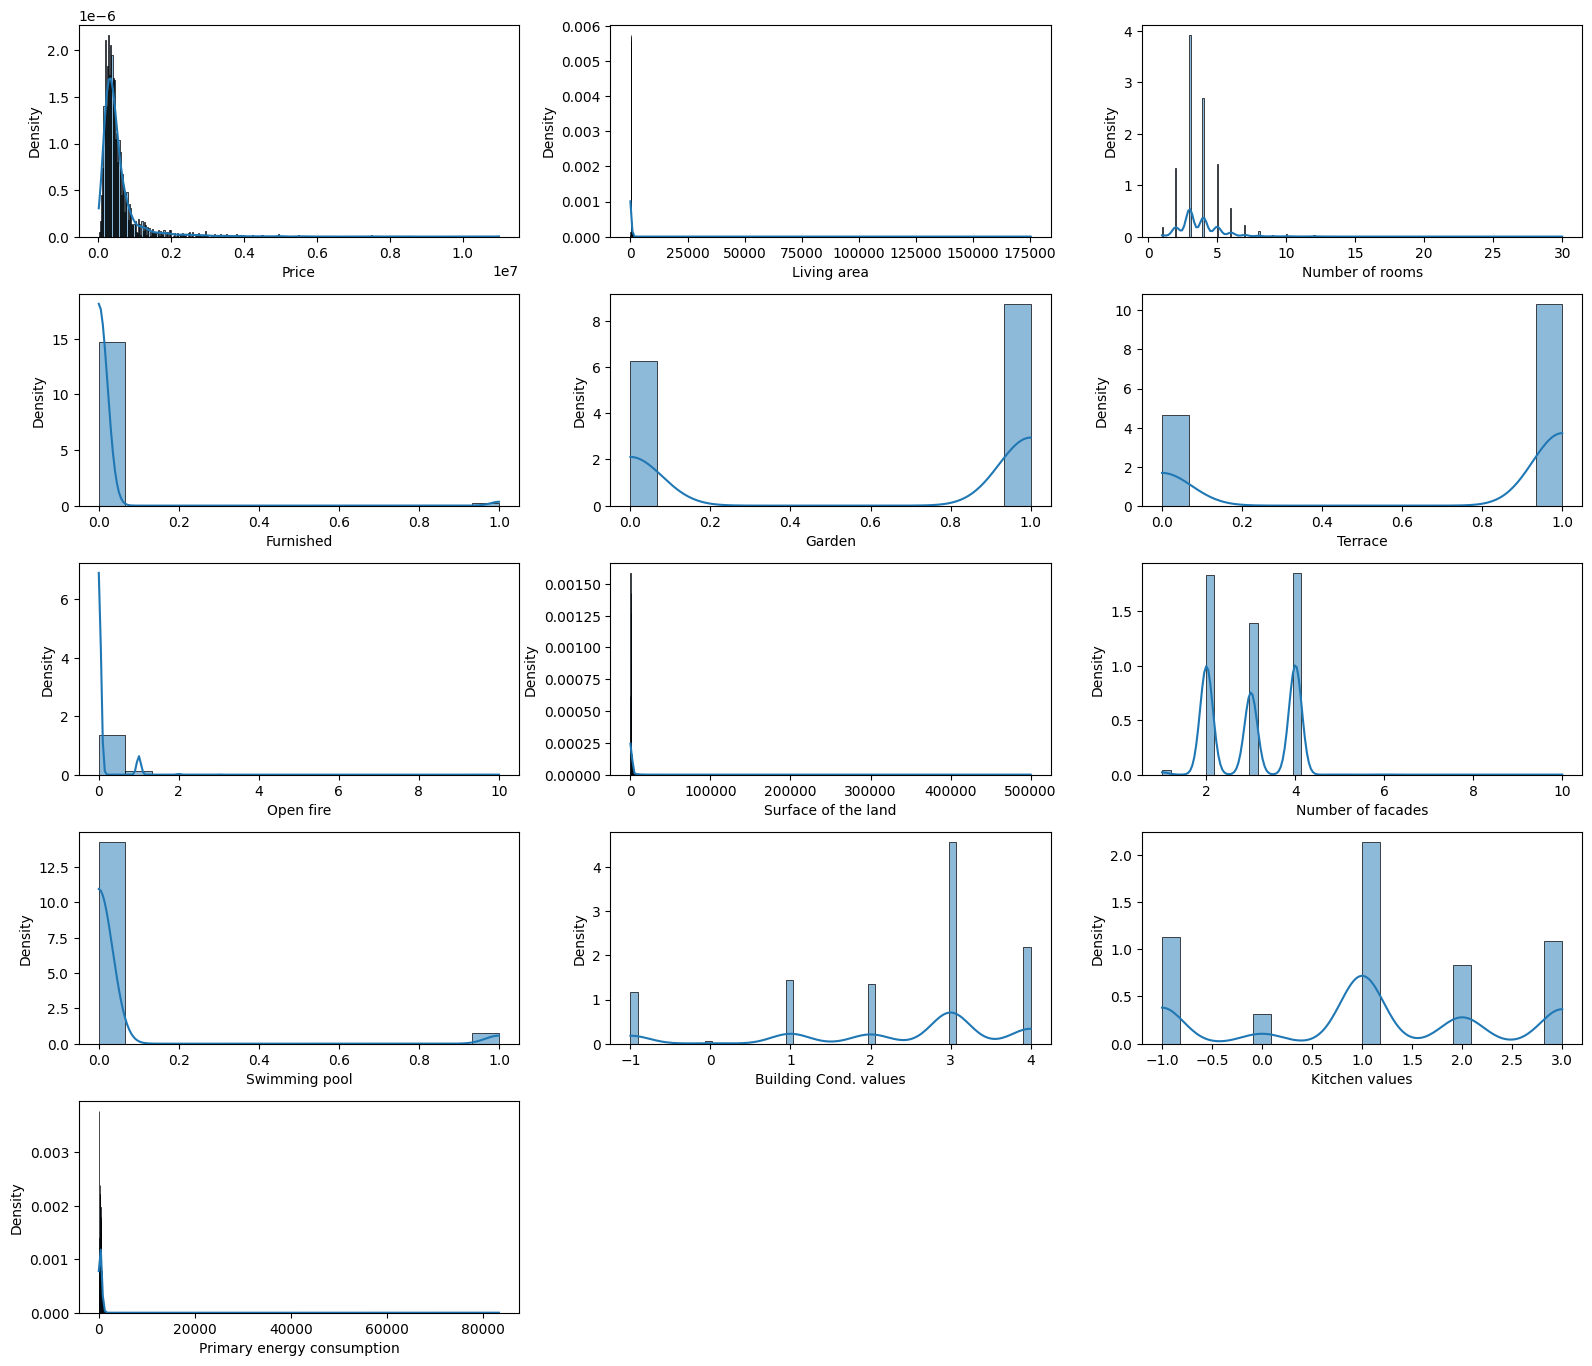

In [16]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(house_target_data):
    plt.subplot(6,3,index+1)
    sns.histplot(house_target_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0)

In [17]:
house_target_data.groupby("Number of facades").agg("count")

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Number of facades,,,,,,,,,,,,
1.0,64,64,64,64,64,64,64,63,64,64,64,64
2.0,2992,2992,2955,2992,2992,2992,2992,2757,2992,2992,2992,2992
3.0,2268,2268,2256,2268,2268,2268,2268,2135,2268,2268,2268,2268
4.0,3024,3024,3015,3024,3024,3024,3024,2965,3024,3024,3024,3024
5.0,3,3,3,3,3,3,3,3,3,3,3,3
6.0,4,4,4,4,4,4,4,3,4,4,4,4
10.0,1,1,1,1,1,1,1,1,1,1,1,1


In [18]:
house_target_data.drop(house_target_data[house_target_data['Number of facades'] >= 5].index, inplace = True)

In [19]:
house_target_data.groupby("Number of rooms")["Price"].agg([min,max,sum])

,min,max,sum
Number of rooms,,,
1.0,25000,3200000,48135299
2.0,10000,2300000,311330344
3.0,16000,4200000,1326081666
4.0,45000,8000000,1308902281
5.0,65000,7500000,1077427340
6.0,99000,8500000,562067754
7.0,99000,11000000,239708699
8.0,115000,11000000,114778445
9.0,185000,2175000,32239000


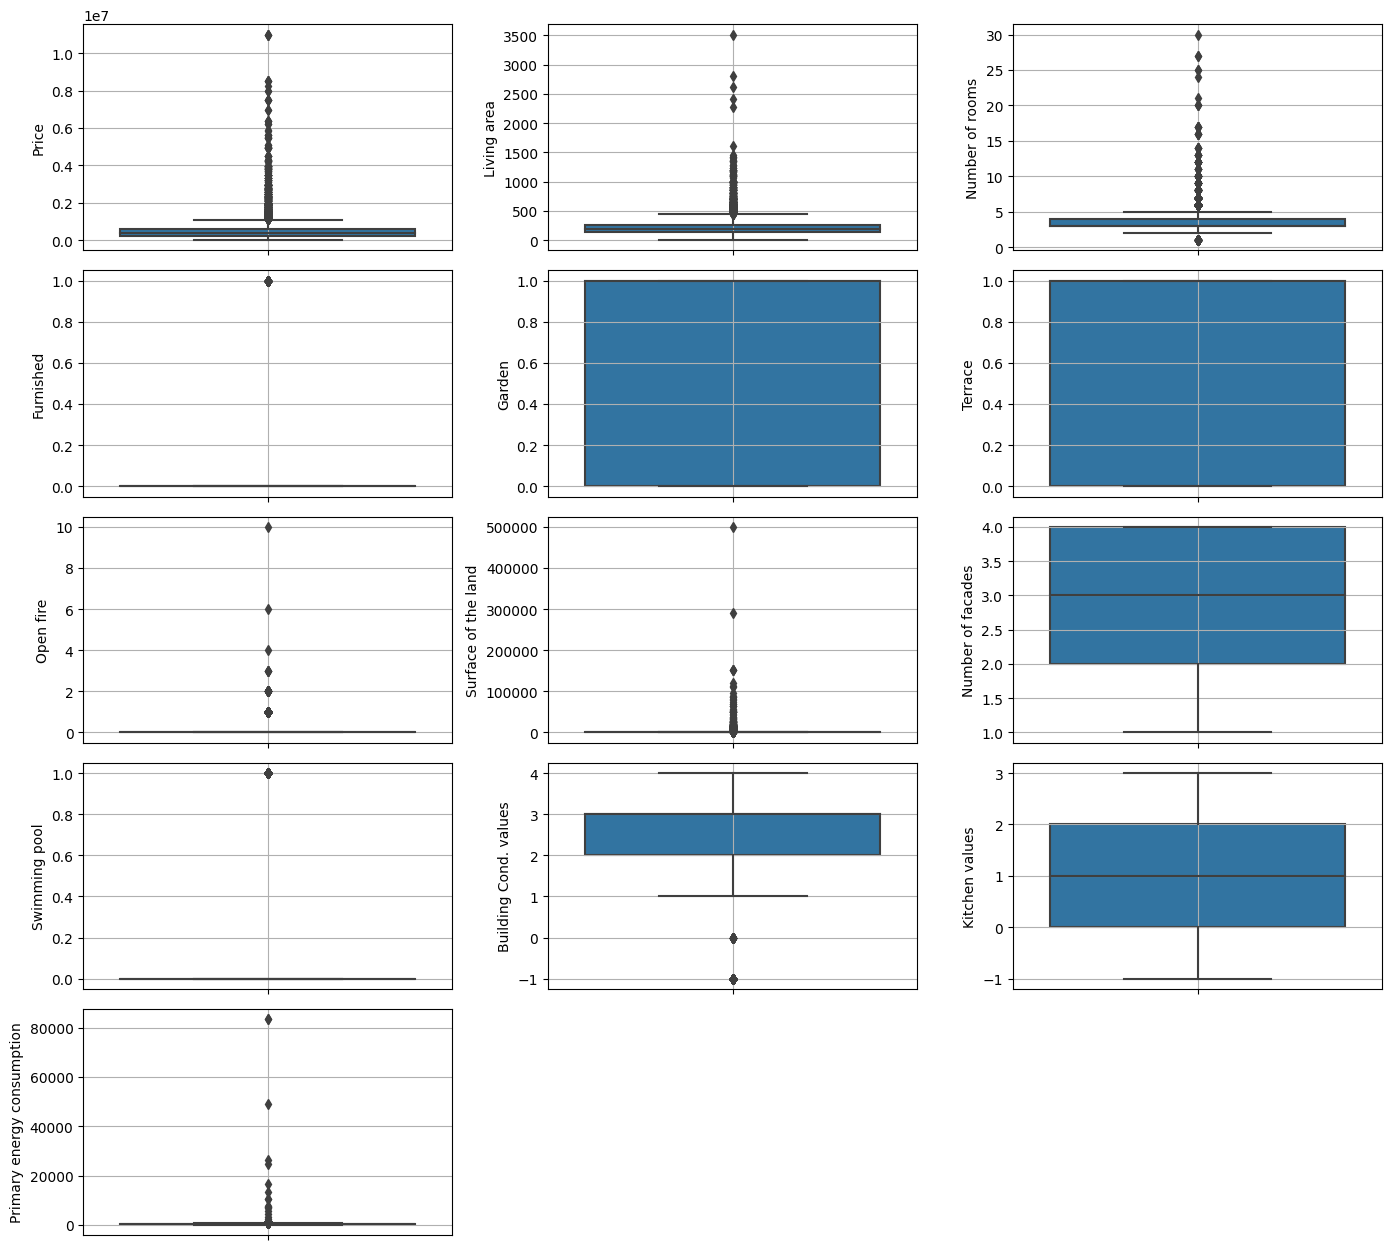

In [20]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(house_target_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=house_target_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

In [21]:
house_target_data["Price per area"] = house_target_data["Price"] / house_target_data["Living area"]

In [22]:
house_target_data["Price per area"].describe()

count      9531.000000
mean       2309.751109
std        4271.256596
min           2.449008
25%        1512.121212
50%        2021.739130
75%        2690.137935
max      399000.000000
Name: Price per area, dtype: float64

In [23]:
correlation = house_target_data.corr()
correlation[['Price per area']].sort_values(['Price per area'], ascending=False)

,Price per area
Price per area,1.000000
Price,0.208283
Swimming pool,0.104616
Kitchen values,0.061274
Number of facades,0.050375
Surface of the land,0.031971
Number of rooms,0.030768
Building Cond. values,0.030117
Terrace,0.024603
Open fire,0.019133


In [24]:
colors = sns.color_palette('flare', 6)
levels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr, cmap = cmap, annot=False, linewidths=.5, norm=norm)

plt.show()

NameError: name 'corr' is not defined

In [ ]:
price = (house_target_data["Price"]/1000)

<Axes: xlabel='Price'>

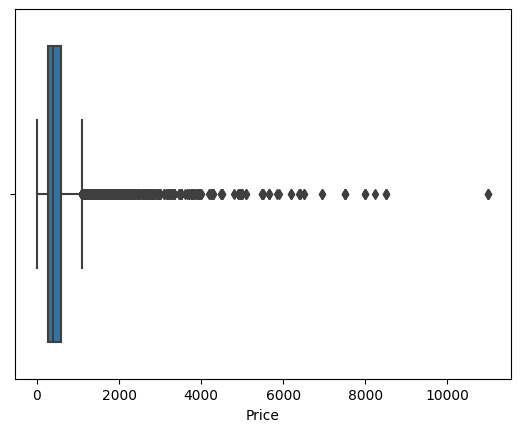

In [ ]:
sns.boxplot(x=price)

In [ ]:
price.describe()

count     9531.000000
mean       553.790801
std        665.326850
min         10.000000
25%        259.000000
50%        385.000000
75%        595.000000
max      11000.000000
Name: Price, dtype: float64

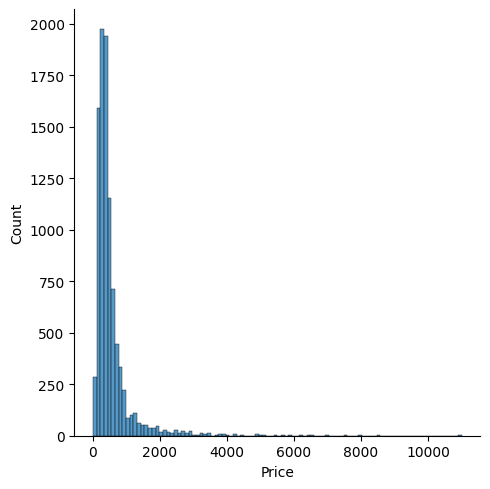

In [ ]:
sns.displot(price,bins=100)

In [ ]:
q1 = price.quantile(0.25)
q3 = price.quantile(0.75)

IQR = q3-q1

In [ ]:
IQR

336.0

In [ ]:
alt = q1 - 1.5 * IQR
ust = q3 + 1.5 * IQR

In [ ]:
house_target_data[~((price<alt)|(price>ust)).any(axis=1)]

NameError: name 'house_target_data' is not defined

In [ ]:
price2.shape

(8716,)

In [ ]:
type(price2)

pandas.core.series.Series

In [ ]:
price_df = pd.DataFrame(price2)

In [ ]:
price_df.describe()

,Price
count,8716.000000
mean,402.867353
std,208.716042
min,10.000000
25%,249.000000
50%,364.250000
75%,519.000000
max,1099.000000


<Axes: xlabel='Price'>

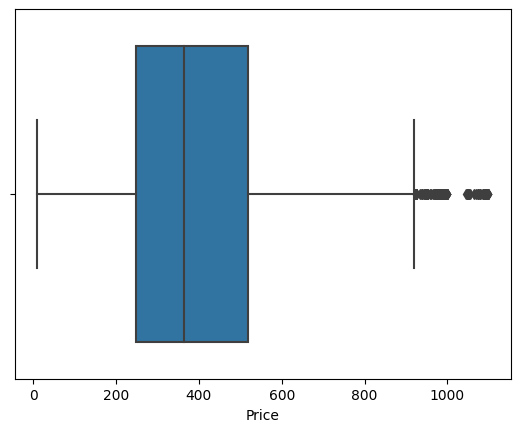

In [ ]:
sns.boxplot(x=price2)

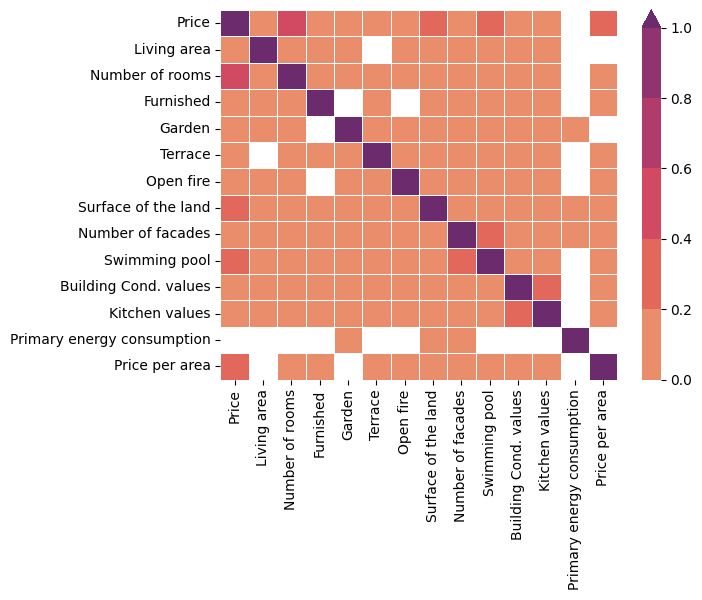

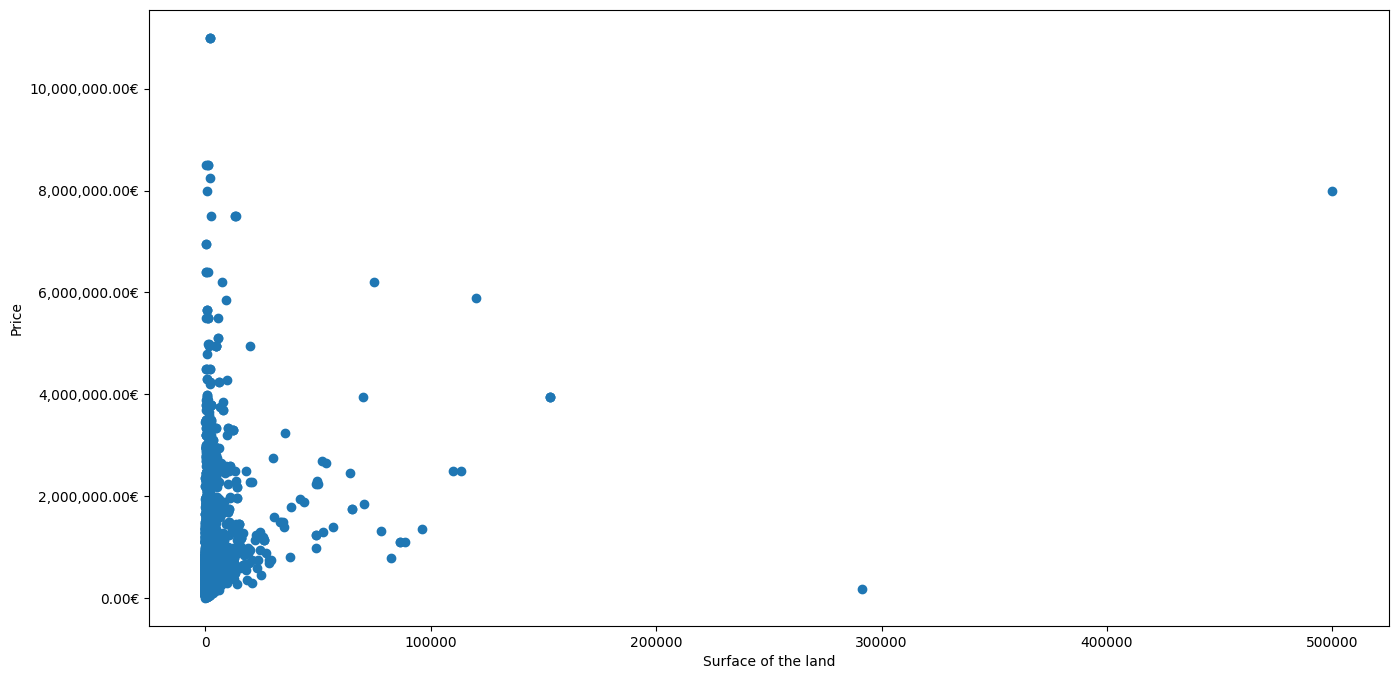

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(house_target_data['Surface of the land'], house_target_data['Price'])
ax.set_xlabel('Surface of the land')
ax.set_ylabel('Price')
fmt = '{x:,.2f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

In [ ]:
house_target_data["Surface of the land"].unique()

array([  256.,   539.,   105., ...,  1757.,  2982., 10012.])